# QCTO - Workplace Module

### Project Title: Global Vegetable Yield
#### Done By: Kyle Ebrahim

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a><br>
<ol>
<a href=#six.one>Simple Linear Regression (SLR) </a><br>
<a href=#six.two>RandomForest </a>
</ol>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [33]:
# Installing own package to check for nulls and duplicates

!pip install git+https://github.com/KGEbrahim/Workplace-project.git@cleaning-branch

  Cloning https://github.com/KGEbrahim/Workplace-project.git (to revision cleaning-branch) to c:\users\kgerr\appdata\local\temp\pip-req-build-zrte6zxg
  Resolved https://github.com/KGEbrahim/Workplace-project.git to commit 3838e5067b05a5bfa3a43cdeae2d4e994bd2a3e2
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/KGEbrahim/Workplace-project.git 'C:\Users\kgerr\AppData\Local\Temp\pip-req-build-zrte6zxg'
  Running command git checkout -b cleaning-branch --track origin/cleaning-branch
  branch 'cleaning-branch' set up to track 'origin/cleaning-branch'.
  Switched to a new branch 'cleaning-branch'


In [1]:
# Packages for data cleaning and EDA
import pandas as pd
import numpy as np
import re

# Importing own package for cleaning
from Packages.Packages import cleaning as cle

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To use statistical tools
from scipy.stats import stats

# Packages for modelling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Importing dataset using pandas and confirming source

"""
The yield dataset was sourced from Kaggle and represents various features of agricultural production and environmental factors across different countries
"""

# Reading in csv data with pandas
df = pd.read_csv(r'C:\Users\kgerr\OneDrive\Documents\ExploreAI\Workplace local\yield_df.csv')
df_copy = df
df_copy

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To use statistical tools
from scipy.stats import stats

# Packages for modelling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [9]:
# Importing dataset using pandas and confirming source

df = pd.read_csv(r'C:\Users\kgerr\OneDrive\Documents\ExploreAI\Workplace local\yield_df.csv')

# From observing the columns a few code cells below I picked up that the unnamed column was used as an index but this is not needed and will be dropped
df.drop(columns=['Unnamed: 0'], inplace=True)

# Creating a copy of the dataframe as a safey measure when modifying the dataframe
df_copy = df
df_copy.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [10]:
'''
The yield dataset was sourced from Kaggle and represents various features of agricultural production and environmental factors across different countries, this was loaded into the workbook using pandas.

It appears to be cleaned already for creating statistical models.
The dataset contains float, int and object data types, 6 columns including an unnamed column and 28424 rows.
'''

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
df_copy.head()
# Previously: Unnamed: 0	Area	Item	Year	hg/ha_yield	average_rain_fall_mm_per_year	pesticides_tonnes	avg_temp

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
# Basic summary check of the numerical variables

df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


**Findings**: 
- The dataset seems to contain data from 1990 to 2013.
- The hectograms per hectare (hg/ha) column would require further understanding of the measurement used.
- The rest of the variables are straightforward, grouping of these variables with aggregations and sorting them should give us more insights.

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [4]:
# Checking for nulls and duplicates

cle.findnulls_duplicates(df_copy)

Number of row duplicates: 0


,null_rows
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0



The dataset appears to be clean from nulls however, 2310 duplicate rows were picked up and will be dropped.

In [5]:
# Assigning non-duplicate values back to df_copy

df_copy = cle.duplicates_removed(df_copy)
df_copy

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


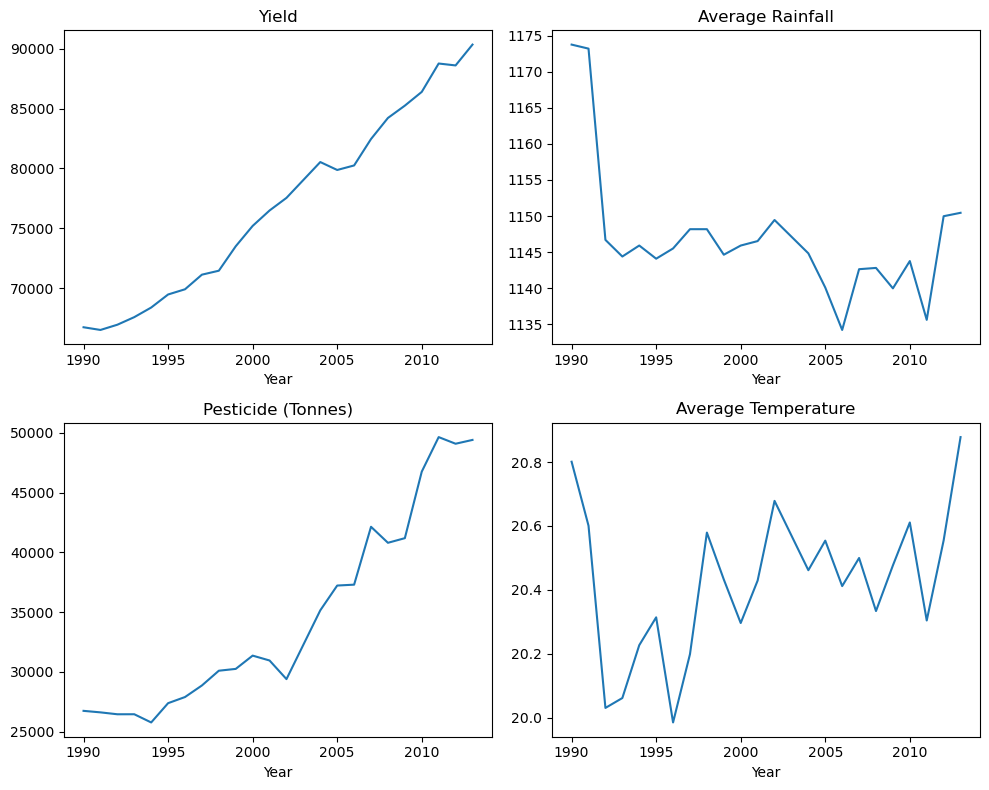

In [10]:
# Exploring the data
"""
The column hg/ha_yield is a measurement of yield 1 hectogram or 100 grams per hector (10000m^2).
Average rainfall in millimetres per year is self-explanatory.
pesticides_tonnes is the measurement of the use of pesticides in tonnes.
"""
# Segment plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Plotting averages by time series
df_copy.groupby('Year')['hg/ha_yield'].mean().plot(title= 'Yield', ax=ax[0, 0])
df_copy.groupby('Year')['average_rain_fall_mm_per_year'].mean().plot(title='Average Rainfall', ax=ax[0, 1])
df_copy.groupby('Year')['pesticides_tonnes'].mean().plot(title='Pesticide (Tonnes)', ax=ax[1, 0])
df_copy.groupby('Year')['avg_temp'].mean().plot(title= 'Average Temperature', ax=ax[1, 1])

# Display plots
plt.tight_layout()
plt.show()

- Yield and pesticide use have increase steadily, with the pesticides and average temperatures having more variability than the yield. Rainfal has maintained a constant average over a decade with considerable dips between 2005 and 2010.
---

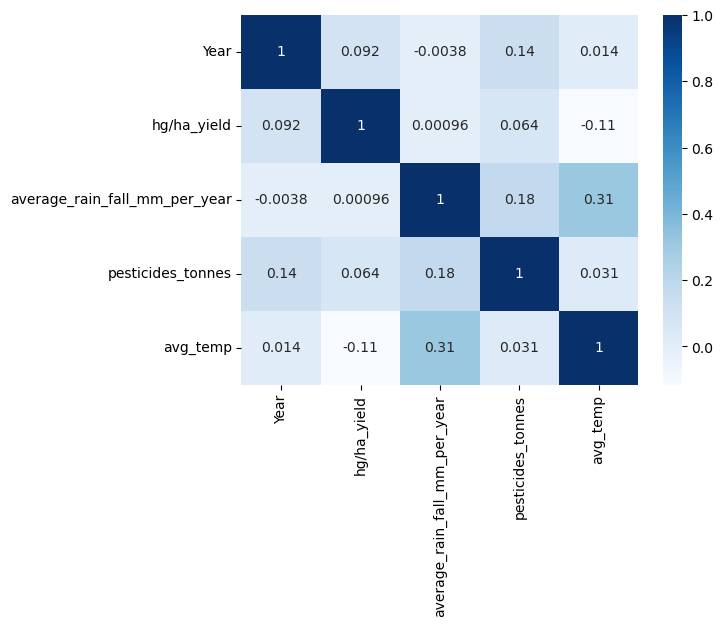

In [7]:
# Visualising correlation using a heatmap

# Store numeric features
num_cols = df_copy.iloc[:, 3:].corr()

sns.heatmap(num_cols, cmap = 'Blues', annot=True)
plt.show()

- There appears to be low levels of correlation amoung the numerical features of the dataset.
- This can be a good thing to ensure lower multicollinearity however, there should still be relevance of features when creating models.
---

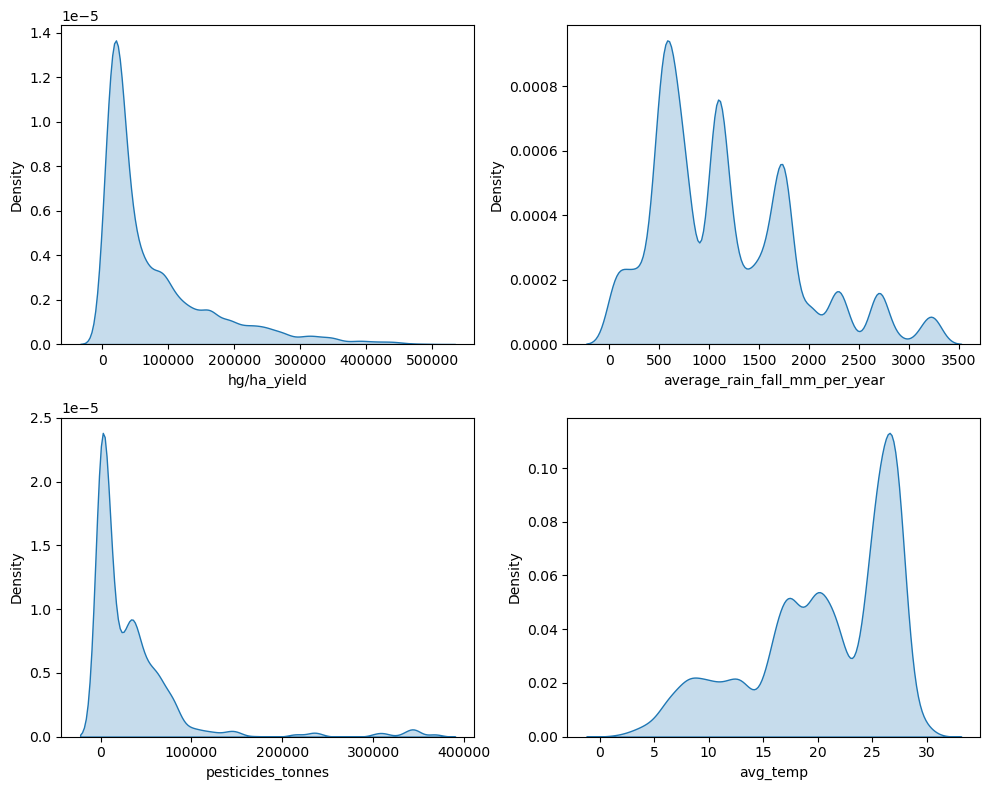

In [12]:
# Creating a KDE plot

# Segment plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Plot each feature on different axis
sns.kdeplot(df_copy['hg/ha_yield'], fill = True, ax=ax[0, 0])
sns.kdeplot(df_copy['average_rain_fall_mm_per_year'], fill = True, ax=ax[0, 1])
sns.kdeplot(df_copy['pesticides_tonnes'], fill = True, ax=ax[1, 0])
sns.kdeplot(df_copy['avg_temp'], fill = True, ax=ax[1, 1])

# Display plots
plt.tight_layout()
plt.show()

- Yield and pesticides are skewed to the right indicating that the distribution of the observations in the dataset are more concentrated in the lower values compared to the higher.
- Average temp has a left skew with several peaks indicating the opposite of yield and pesticides.
- Average rainfall has several peaks as welll and then a drop-off from 2000mm.
---

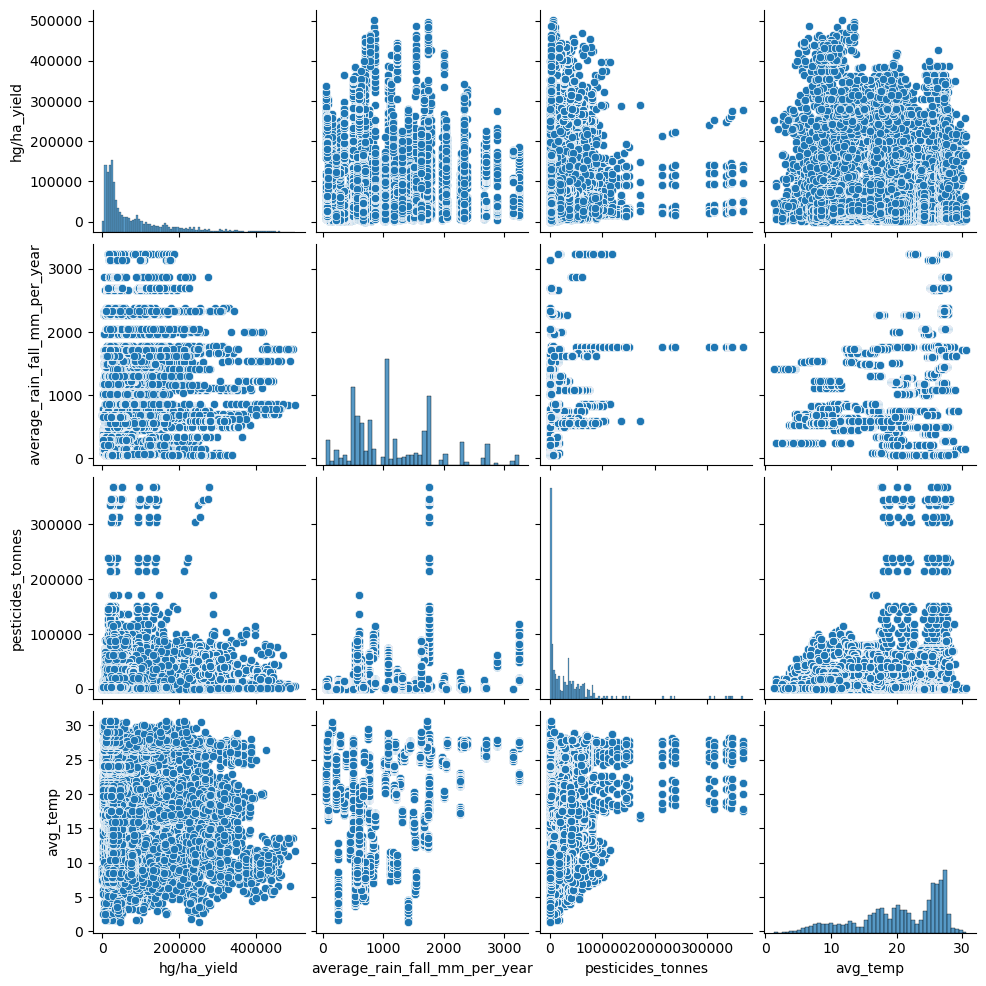

In [26]:
# Creating pairplots to visualize relationships amoung numerical columns

sns.pairplot(df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']])
plt.show()

- No clear trends in any of the features, just concentrations of data in the lower points for yield and pesticides for example.

In [11]:
# Checking for outliers using z-score
import scipy.stats as stats

# Pass numeric cols
z_scores = np.abs(stats.zscore(num_cols))

# Store outliers
outliers = num_cols[(z_scores>3).any(axis=1)]

# Filter df with indices of outliers var
df_copy.loc[outliers.index]

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** In line with the progression of the course, I will display skills of Simple Linear Regression, Multiple Linear Regression
---

<a href=#six.one></a>
### **Simple Linear Regression**

In [25]:
# Encode categorical features
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
area_encoder = OneHotEncoder()
item_encoder = OneHotEncoder()

# Apply encoder
area_encoded = area_encoder.fit_transform(df_copy[['Area']]).toarray()
item_encoded = item_encoder.fit_transform(df_copy[['Item']]).toarray()

# Get features from arrays
area_encoded_df = pd.DataFrame(area_encoded, columns=area_encoder.get_feature_names_out(['Area']))
item_encoded_df = pd.DataFrame(item_encoded, columns=item_encoder.get_feature_names_out(['Item']))

# Concat results to original dataframe
df_copy = pd.concat([df_copy, area_encoded_df, item_encoded_df], axis=1)

# Drop original categorial features
df_copy.drop(['Area', 'Item'], axis=1, inplace=True)

KeyError: "None of [Index(['Area'], dtype='object')] are in the [columns]"

In [27]:
# Store variables for fitting
X = df_copy[['hg/ha_yield']]
y = df_copy['pesticides_tonnes']

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the X data to improve scores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model
slr = LinearRegression().fit(X_train, y_train)

# Predict y-values
slr_y_pred = slr.predict(X_test)

# Evaluate test scores
slr_mse = metrics.mean_squared_error(y_test, slr_y_pred)
slr_mae = metrics.mean_absolute_error(y_test, slr_y_pred)
slr_rscore = metrics.r2_score(y_test, slr_y_pred)

print(f"Mean Squared Error: {slr_mse} \nMean Absolute Error: {slr_mae} \nR2 Score: {slr_rscore}")


Mean Squared Error: 3537118321.5418687 
Mean Absolute Error: 35480.15801995547 
R2 Score: 0.00404554757830855


- The poor metric scores suggest that the model does not capture the underlying relationships in the prediction of pesticides.
---

<a href=#six.two></a>
### **Random Forest**

In [ ]:
# Initialize and fit the model
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Predict y-values
rf_y_pred = rf.predict(X_test)

# Evaluate test scores
rf_mse = metrics.mean_squared_error(y_test, rf_y_pred)
rf_mae = metrics.mean_absolute_error(y_test, rf_y_pred)
rf_rscore = metrics.r2_score(y_test, rf_y_pred)

print(f"Mean Squared Error: {rf_mse} \nMean Absolute Error: {rf_mae} \nR2 Score: {rf_rscore}")

Mean Squared Error: 578135934.389089 
Mean Absolute Error: 9168.60756041497 
R2 Score: 0.837212949746959


- Much better scores than simple linear regression however, the model is off by 9168 tonnes as suggested by the MAE.
- Let's first try multiple linear regression before improving our random forest regressor.
---

<a href=#six.two></a>
### **Multiple Linear Regression**

In [34]:
# Store variables for fitting
y = df_copy['pesticides_tonnes']
X = df_copy.drop(y.name, axis=1)

# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the X data to improve scores
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize model
mlr = LinearRegression().fit(X_train, y_train)

# Predict y-values
mlr_y_pred = mlr.predict(X_test)

# Evaluate test scores
mlr_mse = metrics.mean_squared_error(y_test, mlr_y_pred)
mlr_mae = metrics.mean_absolute_error(y_test, mlr_y_pred)
mlr_rscore = metrics.r2_score(y_test, mlr_y_pred)

print(f"Mean Squared Error: {mlr_mse} \nMean Absolute Error: {mlr_mae} \nR2 Score: {mlr_rscore}")

Mean Squared Error: 997291885.304712 
Mean Absolute Error: 16908.569149371935 
R2 Score: 0.7191902551056649


- The improvement from simple to multiple linear regression is significant, not is the MAE improved by nearly half but the r2 score explains much more of the variance of pesticides.

---

<a href=#six.two></a>
### **Random Forest Improved**

In [47]:
# Initialize and fit the model with all possible predictors
rf2 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=4).fit(X_train, y_train)

# Predict y-values
rf_y_pred2 = rf2.predict(X_test)

# Evaluate test scores
rf2_mse = metrics.mean_squared_error(y_test, rf_y_pred2)
rf2_mae = metrics.mean_absolute_error(y_test, rf_y_pred2)
rf2_rscore = metrics.r2_score(y_test, rf_y_pred2)

print(f"Mean Squared Error: {rf2_mse} \nMean Absolute Error: {rf2_mae} \nR2 Score: {rf2_rscore}")

Mean Squared Error: 42165.04624856698 
Mean Absolute Error: 36.55329433531466 
R2 Score: 0.9999881274920062


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

### **Simple Linear Regression**

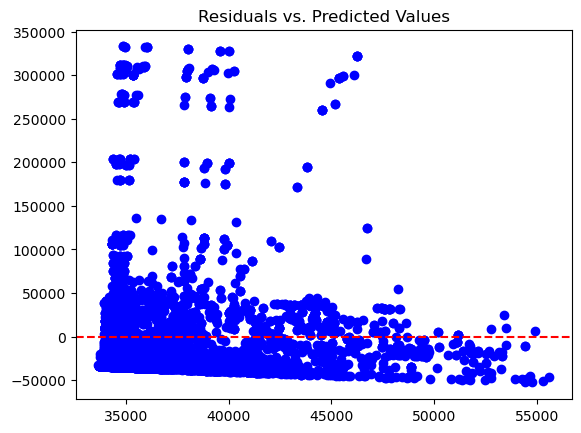

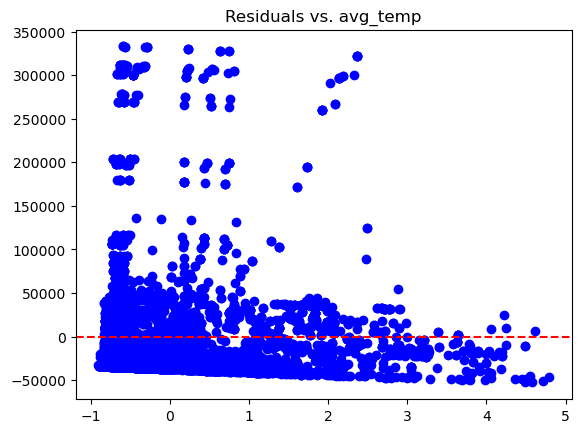

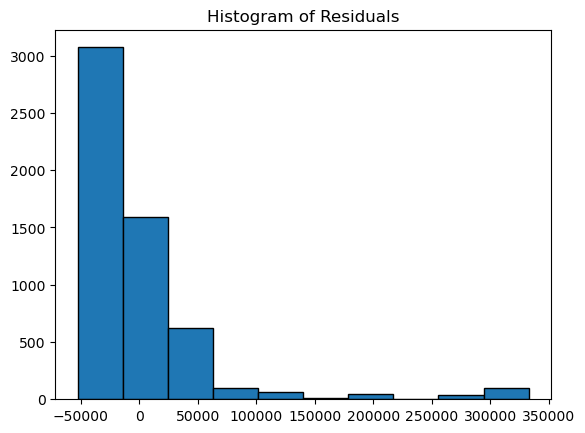

In [28]:
# Residual analysis
slr_residuals = y_test - slr_y_pred

# 1. Residuals vs. Predicted Values
plt.scatter(slr_y_pred, slr_residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# 2. Residuals vs. Independent Variable
plt.scatter(X_test, slr_residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. avg_temp')
plt.show()

# 3. Histogram of Residuals
plt.hist(slr_residuals, bins=10, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

- The scatter plots display clear signs of heteroscedasticity, a non-uniform spread of errors above and below the zero line, the histogram displays large spreads of errors and a right skew, suggesting predictions are below the actual values.
- There is clear clustering of residuals versus actual values in the lower ends of the plots and a pattern-following variance of residuals with predicted values and average temperature.

### **Random Forest**

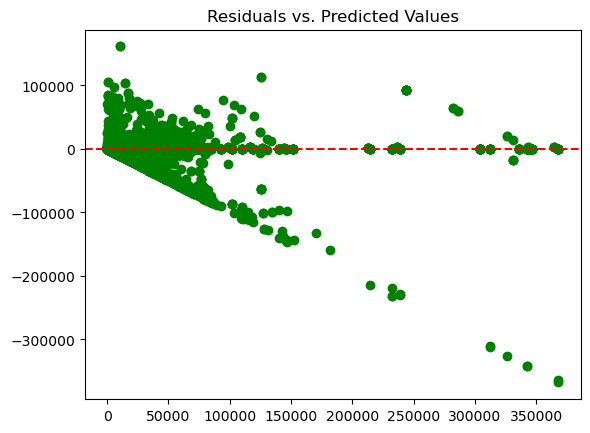

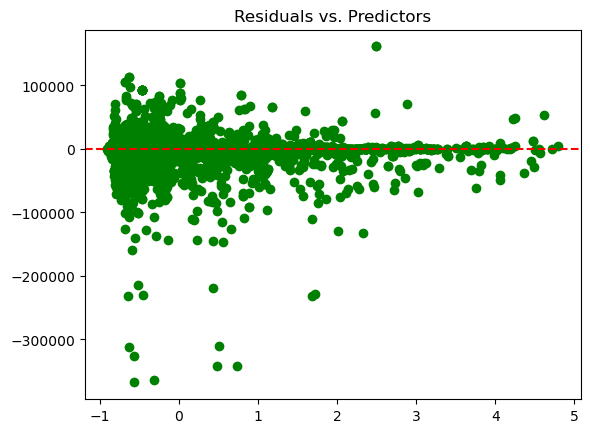

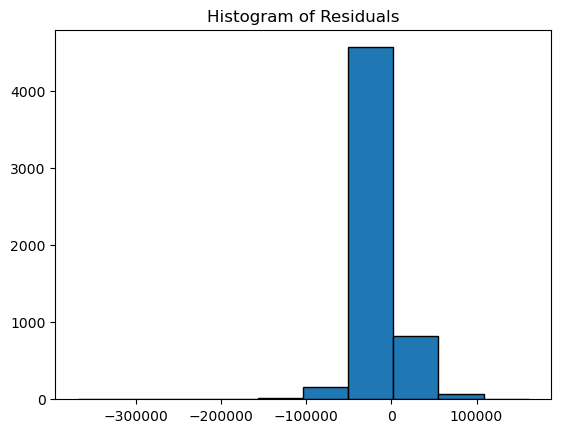

In [30]:
# Calculate residuals
rf_residuals = y_test - rf_y_pred

# Residuals vs. Predicted values
plt.scatter(rf_y_pred, rf_residuals, color="green")
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Residuals vs predictors
plt.scatter(X_test, rf_residuals, color='green')
plt.axhline(y=0, color='red', linestyle= '--')
plt.title("Residuals vs. Predictors")
plt.show()

# Distribution of residuals
plt.hist(rf_residuals, bins=10, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

- The residuals against the predicted values and the predictors both seems to cluster in the lower values indicating that the model predicts well for a subset of lower values in the dataset.
- The cone-like pattern of these plots indicate clear heteroscedasticity of the errors not being constant across the predicted and predictor values.
- The histogram shows good results and that is the errors centering aroung the 0 point which suggests the model is generally unbiased and does not under nor overestimate the predicted variable, the large left tail however, indicates outliers but none were found using zscores, the use of only one predictor in this model could be the reason why.
- In comparison to the linear models, the random forest regressor performs much better.

### **Multiple Linear Regression**

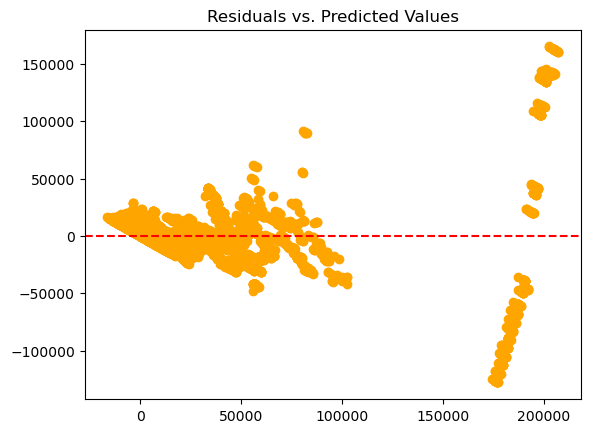

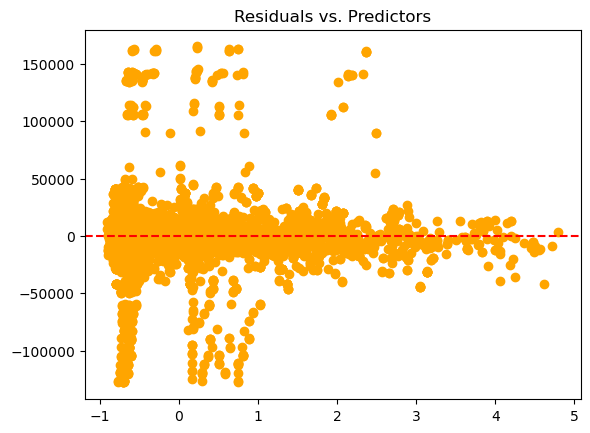

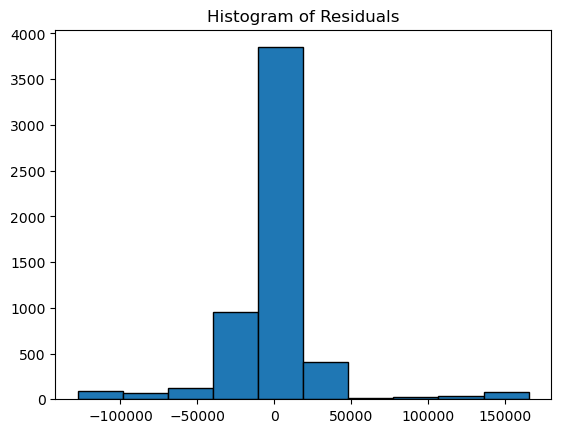

In [32]:
# Residual analysis
mlr_residuals = y_test - mlr_y_pred

# 1. Residuals vs. Predicted Values
plt.scatter(mlr_y_pred, mlr_residuals, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# 2. Residuals vs. Independent Variable
plt.scatter(X_test, mlr_residuals, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predictors')
plt.show()

# 3. Histogram of Residuals
plt.hist(mlr_residuals, bins=10, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

- More or less of the same results as the random forest regressor, the is a concentration of residuals in the lower values and negative residuals as the predicted values increase suggesting underestimation of the target variable.
- Similar cone-shape of these plots indicate a pattern in the variance opposed to randomness in the residuals that we're looking for.
- Decent centering of the residuals around the 0 point suggests little to no bias in the model to predict.

### **Random Forest Improved**

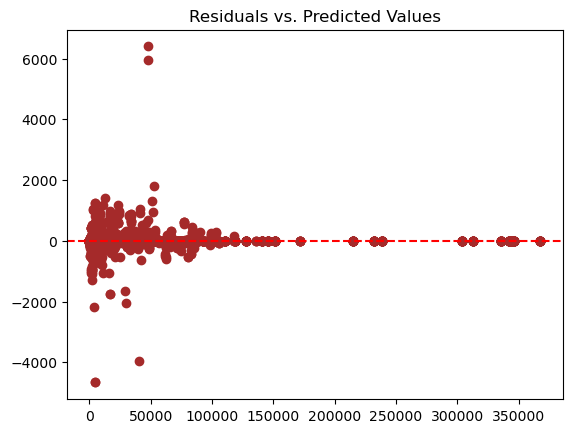

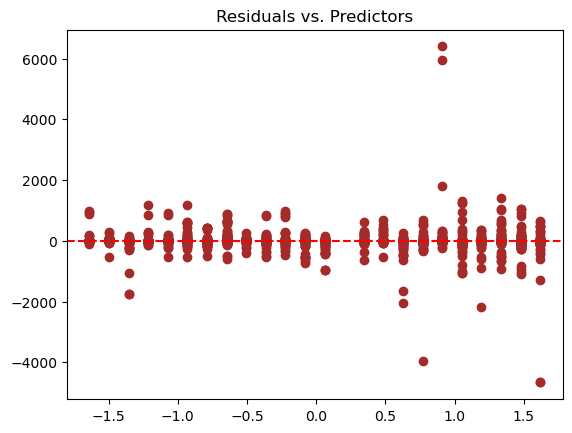

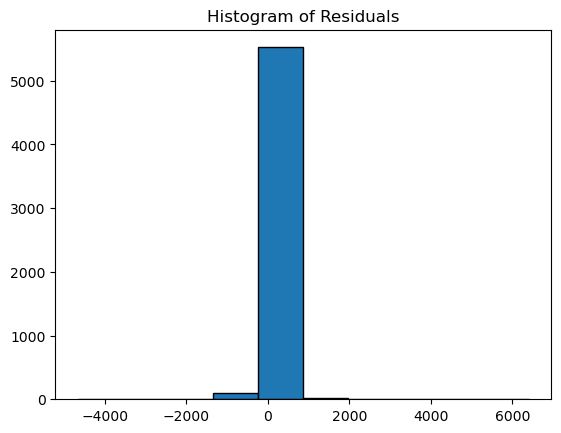

In [48]:
# Calculate residuals
rf2_residuals = y_test - rf_y_pred2

# Residuals vs. Predicted values
plt.scatter(rf_y_pred2, rf2_residuals, color="brown")
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Residuals vs predictors
plt.scatter(X_test[:, 0], rf2_residuals, color='brown')
plt.axhline(y=0, color='red', linestyle= '--')
plt.title("Residuals vs. Predictors")
plt.show()

# Distribution of residuals
plt.hist(rf2_residuals, bins=10, edgecolor='black')
plt.title('Histogram of Residuals')
plt.show()

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [18]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [19]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [20]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
